# Homework 6 (Due 11/15/2024 at 11:59pm)



## Name:

## ID:

**Submission instruction:**
- Download the file as .ipynb (see top right corner on the webpage).
- Write your name and ID in the field above.
- Answer the questions in the .ipynb file in either markdown or code cells.
- Before submission, make sure to rerun all cells by clicking `Kernel` -> `Restart & Run All` and check all the outputs.
- Upload the .ipynb file to Gradescope.

**Q1.** How to predict the future? Can we use past temperatures to predict future temperatures? Can we use past stock prices to predict future stock prices? 

These are examples of time series data. If we collect the temperature data, then we only have a sequence of numbers. Compared with the penguins dataset, it seems that we have very limited number of features. However, in time series data, each observation is linked to previous ones.

Let's first generate a synthetic time series data.

$$ y = \sin(2\pi t/60) + \exp(t/90) + \epsilon $$

where $\epsilon$ is a random noise.

This is an example of a time series data with a long term trend with seasonality. This could be a model for the temperature data.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


np.random.seed(0)  # For reproducibility
N = 180
t = np.arange(N)
value = np.sin(2*np.pi*t/60) + np.random.normal(0, 0.1, N) + np.exp(t/90)
df = pd.DataFrame({'Time': t, 'Value': value})
df



,Time,Value
0,0,1.176405
1,1,1.155717
2,2,1.328256
3,3,1.567001
4,4,1.638939
...,...,...
175,175,6.557907
176,176,6.580767
177,177,6.768842
178,178,6.973201


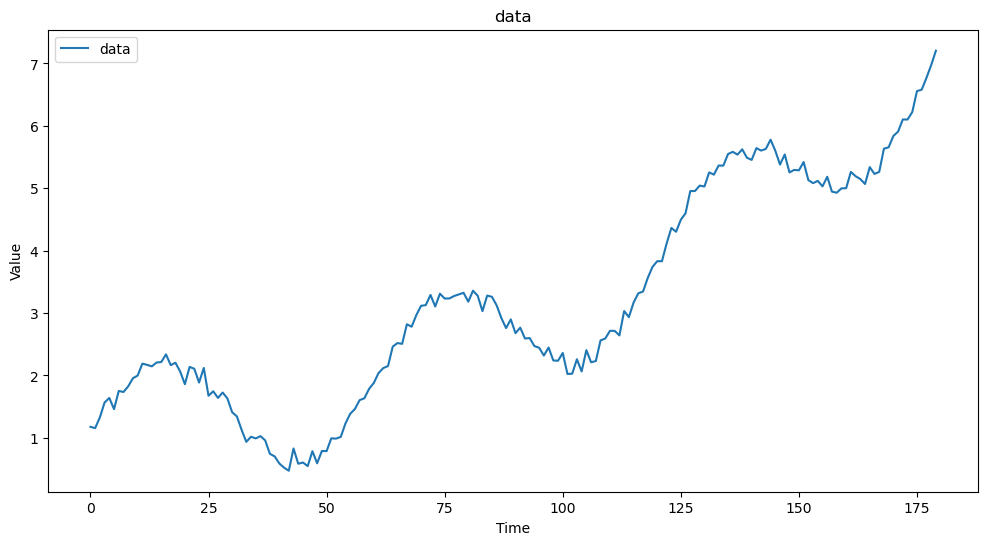

In [2]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['Value'], label='data')
plt.title('data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

One model of time series data is the autoregressive model, which is a linear regression model that uses the previous observations as features.

$$ y_{t} = \beta_0 + \beta_1 y_{t-1} + \beta_2 y_{t-2} + \cdots + \beta_p y_{t-p}$$

where $y_{t-1}, y_{t-2}, \cdots, y_{t-p}$ are the previous observations (also called lags), and they are used as features to predict the current observation $y_{t}$.

In [3]:
# Create lagged features for t-1 to t-p
df_shift = df.copy()

p = 3

for lag in range(1, p+1):
    df_shift[f'Value_t-{lag}'] = df_shift['Value'].shift(lag)

df_shift


,Time,Value,Value_t-1,Value_t-2,Value_t-3
0,0,1.176405,NaN,NaN,NaN
1,1,1.155717,1.176405,NaN,NaN
2,2,1.328256,1.155717,1.176405,NaN
3,3,1.567001,1.328256,1.155717,1.176405
4,4,1.638939,1.567001,1.328256,1.155717
...,...,...,...,...,...
175,175,6.557907,6.221304,6.101900,6.103135
176,176,6.580767,6.557907,6.221304,6.101900
177,177,6.768842,6.580767,6.557907,6.221304
178,178,6.973201,6.768842,6.580767,6.557907


In [4]:
# Drop rows with NaN values
df_shift = df_shift.dropna()
df_shift

,Time,Value,Value_t-1,Value_t-2,Value_t-3
3,3,1.567001,1.328256,1.155717,1.176405
4,4,1.638939,1.567001,1.328256,1.155717
5,5,1.459400,1.638939,1.567001,1.328256
6,6,1.751733,1.459400,1.638939,1.567001
7,7,1.734877,1.751733,1.459400,1.638939
...,...,...,...,...,...
175,175,6.557907,6.221304,6.101900,6.103135
176,176,6.580767,6.557907,6.221304,6.101900
177,177,6.768842,6.580767,6.557907,6.221304
178,178,6.973201,6.768842,6.580767,6.557907


(1) Split the data into train and test sets. Instead of splitting the data randomly as we did in the penguins dataset, we will split the data in a sequential manner.

We will use the first 50% of the data for training and the remaining 50% for testing.


In [5]:
# Define the split index
split_index = int(len(df_shift) * 0.5)

# Split the dataset into training and testing sets
train_df = df_shift.iloc[:split_index]
test_df = df_shift.iloc[split_index:]


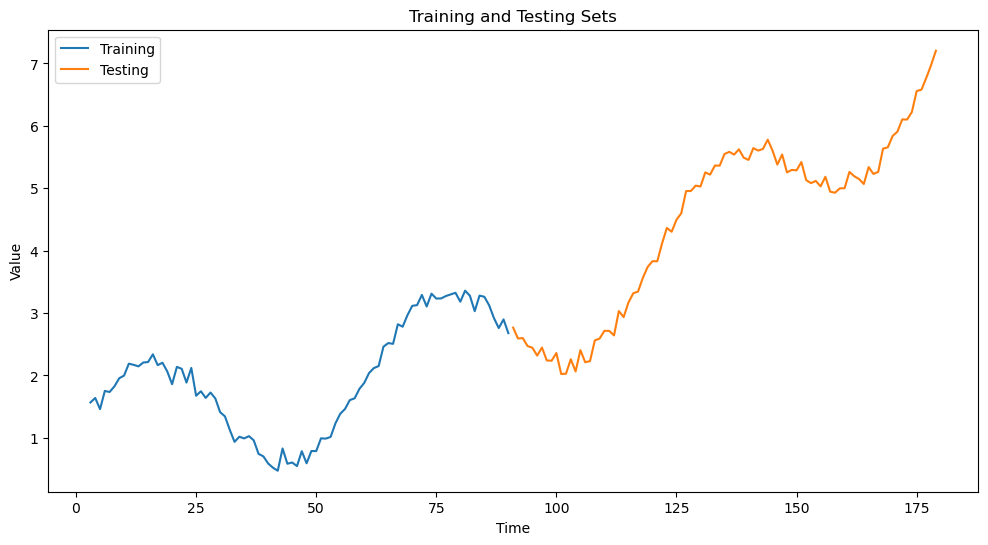

In [6]:
# example code to plot the training and testing sets
# need to save the training and testing dataframe as variable names train_df and test_df
plt.figure(figsize=(12, 6))
plt.plot(train_df['Time'], train_df['Value'], label='Training')
plt.plot(test_df['Time'], test_df['Value'], label='Testing')
plt.title('Training and Testing Sets')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

(2) Fit a linear regression model to the training data and make prediction on the test data. That is, use the features `Value_t-1` ... `Value_t-p` to predict `Value`.

In [7]:

features = [f'Value_t-{lag}' for lag in range(1, p+1)]
target = ['Value']

model = LinearRegression()
model.fit(train_df[features], train_df[target])
predictions = model.predict(test_df[features])

err = mean_squared_error(test_df[target], predictions)
print(f'Mean Squared Error: {err}')

Mean Squared Error: 0.029921841615967348


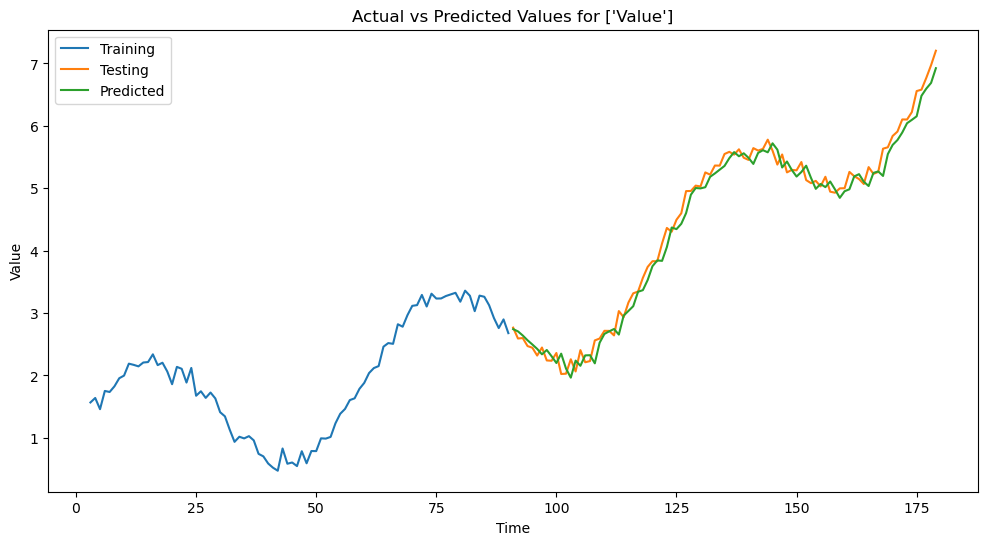

In [8]:
# Example code for plotting the actual and predicted values
# Save the predictions on the test data in a variable called `prediction` for visualization.
plt.figure(figsize=(12, 6))
plt.plot(train_df['Time'], train_df['Value'], label=f'Training')
plt.plot(test_df['Time'], test_df['Value'], label=f'Testing')
plt.plot(test_df['Time'], predictions, label=f'Predicted')
plt.title(f'Actual vs Predicted Values for {target}')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

(3) Try different values of p. How does the model performance change?

As p increase, the testing error decrease and then increase. 

**Q2** 

Sometimes the number of features can be much larger than the number of samples. This is called the high-dimensional dataset.

In this problem, we compare Lasso and Ridge regression on a synthetic high-dimensional dataset with n = 20 and p = 100.

Each feature vector $X_0$, ... $X_{99}$ is generated from a normal distribution with mean 0 and standard deviation 1.

The true model is

$$ y = 3X_0 - 2X_1 + 5 X_2 $$

That is, only a small number of features are actually relevant to the target variable $y$. 


In [9]:
# DO NOT modify this cell
# Generate synthetic high-dimensional data
import numpy as np
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

np.random.seed(0)
n = 20  # number of observations
p = 100  # number of features
X = np.random.randn(n, p)
true_coef = np.concatenate([np.array([3, -2, 5]), np.zeros(p - 3)])
y = np.dot(X, true_coef)


(1) Fit a Lasso and a Ridge regression model to this dataset without the intercept term and use $\alpha=0.1$. Compute and compare the means square error of the two models. Which model has a smaller MSE?



In [10]:

# Lasso Regression
lasso = Lasso(alpha=0.1, fit_intercept=False)
lasso.fit(X, y)

# Ridge Regression
ridge = Ridge(alpha=0.1, fit_intercept=False)
ridge.fit(X, y)

print("Lasso Mean Squared Error:", mean_squared_error(y, lasso.predict(X)))
print("Ridge Mean Squared Error:", mean_squared_error(y, ridge.predict(X)))


Lasso Mean Squared Error: 0.03250277108009776
Ridge Mean Squared Error: 5.223539906925877e-05


(2) Collect the coefficents of the two models. Make a bar plot of the coefficients of the two models. That is, draw a bar of length $\beta_i$ at position i (sample plot shown below).

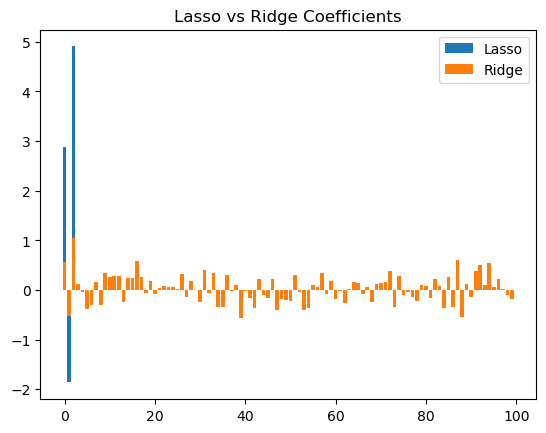

In [11]:

lasso_coef = lasso.coef_
ridge_coef = ridge.coef_

plt.bar(range(len(lasso_coef)), lasso_coef, label='Lasso')
plt.bar(range(len(ridge_coef)), ridge_coef, label='Ridge')
plt.title('Lasso vs Ridge Coefficients')
plt.legend()

# Lasso is preferred in this case. While it has a higher MSE than ridge, it can recover the true coefficients by setting the irrelevant coefficients to zero. 
# Ridge, on the other hand, will make all coefficients small but non-zero.

(3) Which model is preferred in this case, and why?

Lasso is preferred in this case. While it has a higher MSE than ridge, it can recover the true coefficients by setting the irrelevant coefficients to zero. 
Ridge, on the other hand, will make all coefficients small but non-zero.